# Task 3 by Varun Gupta

## Answer - 1: -

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("cancer_reg.csv",encoding="iso-8859-1")
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
df.shape

(3047, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [6]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [7]:
df.drop(['PctPrivateCoverageAlone','PctSomeCol18_24'],axis=1,inplace=True)

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [9]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   int64  
 5   popEst2015              3047 non-null   int64  
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  AvgHouseholdSize        3047 non-null   float64
 12  PercentMarried          3047 non-null   float64
 13  PctNoHS18_24            3047 non-null   float64
 14  PctHS18_24              3047 non-null   

In [10]:
numeric_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,64.354939,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.647057,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,22.300000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,57.200000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,65.100000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,72.100000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [11]:
numeric_df.shape

(3047, 30)

In [12]:
numeric_df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [13]:
y = numeric_df['TARGET_deathRate']
x = numeric_df.drop(columns=['TARGET_deathRate'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
'''for col in x_train_selected.head(10):
    numeric_df_selected = numeric_df.filter(['PctBachDeg25_Over', 'incidenceRate', 'medIncome', 'PctHS25_Over', 'avgDeathsPerYear', 'PctHS18_24', 'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds', 'popEst2015'],axis=1)
    Q1 = numeric_df_selected[col].quantile(0.25)
    Q3 = numeric_df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    numeric_df_filtered = numeric_df_selected[(numeric_df_selected[col] >= lower_bound) & (numeric_df_selected[col] <= upper_bound)]
numeric_df_filtered.head(10)'''

"for col in x_train_selected.head(10):\n    numeric_df_selected = numeric_df.filter(['PctBachDeg25_Over', 'incidenceRate', 'medIncome', 'PctHS25_Over', 'avgDeathsPerYear', 'PctHS18_24', 'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds', 'popEst2015'],axis=1)\n    Q1 = numeric_df_selected[col].quantile(0.25)\n    Q3 = numeric_df_selected[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    numeric_df_filtered = numeric_df_selected[(numeric_df_selected[col] >= lower_bound) & (numeric_df_selected[col] <= upper_bound)]\nnumeric_df_filtered.head(10)"

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)
linear_pred1 = linear_reg.predict(x_train_scaled)
linear_pred2 = linear_reg.predict(x_test_scaled)
linear_mse1 = mean_squared_error(y_train, linear_pred1)
linear_mse2 = mean_squared_error(y_test, linear_pred2)
linear_r2 = r2_score(y_test, linear_pred2)
linear_mae = mean_absolute_error(y_test, linear_pred2)
print("Linear Regression MSE1:", linear_mse1)
print("Linear Regression MSE2:", linear_mse2)
print("Linear Regression R^2:", linear_r2)
print("Linear Regression MAE:", linear_mae)

Linear Regression MSE1: 357.58262383249325
Linear Regression MSE2: 413.78134635889717
Linear Regression R^2: 0.49430646510425147
Linear Regression MAE: 15.090836785093886


In [18]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train_scaled, y_train)
lasso_pred = lasso_reg.predict(x_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R^2:", lasso_r2)
print("Lasso Regression MAE:", lasso_mae)

Lasso Regression MSE: 411.7562541375802
Lasso Regression R^2: 0.4967813858634861
Lasso Regression MAE: 15.053306745980045


In [19]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train_scaled, y_train)
ridge_pred = ridge_reg.predict(x_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R^2:", ridge_r2)
print("Ridge Regression MAE:", ridge_mae)

Ridge Regression MSE: 413.66503360552883
Ridge Regression R^2: 0.49444861411102015
Ridge Regression MAE: 15.088313947574543


In [20]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

importances = dt.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

top_features = feature_importances.head(10)['feature'].tolist()

print("\nTop 10 features selected by Decision Tree:")
print(top_features)

x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]


Top 10 features selected by Decision Tree:
['PctBachDeg25_Over', 'incidenceRate', 'medIncome', 'PctHS25_Over', 'avgDeathsPerYear', 'PctHS18_24', 'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds', 'popEst2015']


In [21]:
lr_selected = LinearRegression()
lr_selected.fit(x_train_selected, y_train)
lr_selected_pred = lr_selected.predict(x_test_selected)
lr_selected_mse = mean_squared_error(y_test, lr_selected_pred)
lr_selected_r2 = r2_score(y_test, lr_selected_pred)
lr_selected_mae = mean_absolute_error(y_test, lr_selected_pred)
print("Linear Regression MSE:", lr_selected_mse)
print("Linear Regression R^2:", lr_selected_r2)
print("Linear Regression MAE:", lr_selected_mae)

Linear Regression MSE: 438.61920258404905
Linear Regression R^2: 0.46395143961976515
Linear Regression MAE: 15.822381444429364


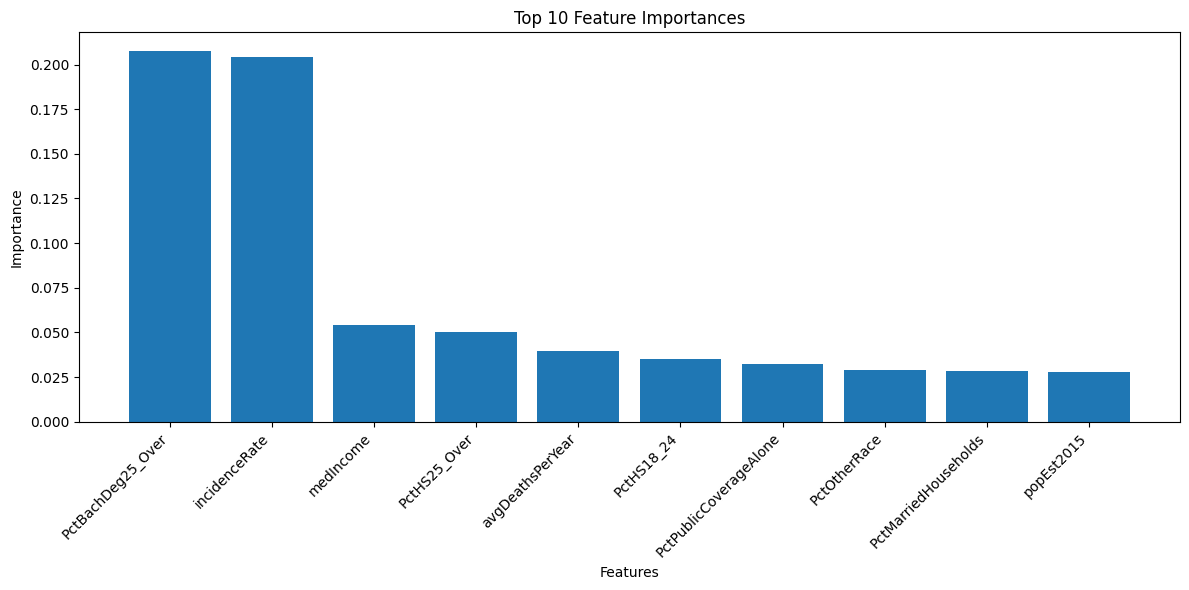

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(top_features, feature_importances.head(10)['importance'])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Answer - 2: The Huber loss function is defined as the combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE) loss functions.
#### Huber Loss combines the advantages of MSE and MAE. It is less sensitive to outliers than MSE and differentiable everywhere, unlike MAE.

### Huber Loss is defined as:-
![alt text](image.png)

### Advantages:-
#### 1) Robust to outliers, providing a balance between MSE and MAE.
#### 2) Differentiable, facilitating gradient-based optimization.

### Disadvantages:-
#### 1) Requires tuning of the parameter δ.

## Answer - 3: 

#### Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

#### Discrete output example: A weather prediction model that predicts whether or not there’ll be rain on a particular day. Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

#### Step 1: Import the required libraries.
#### Step 2: Initialize and print the Dataset.
#### Step 3: Select all the rows and column 1 from the dataset to “X”.
#### Step 4: Select all the rows and column 2 from the dataset to “y”.
#### Step 5: Fit decision tree regressor to the dataset.
#### Step 6: Predicting a new value.
#### Step 7: Visualising the result.
#### Step 8: The tree is finally exported and shown in the TREE STRUCTURE below.